### Turknet Şikayetleri Veri Analizi

#### Verileri, şikayetvar sitesinden şikayet başlığı, yazar, tarih ve anahtar kelimeleri BeautifulSoup kütüphanesini kullanarak aldım. Veriler, Eylül 2024 ayından 7 Kasım 2024 tarihine kadar olan, saatlik verilerdir.

In [ ]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("sikayetler.csv")

In [3]:
df

,Sikayet Başlığı,Yazar,Tarih,Anahtar Kelime
0,5 Yıl Sonra Gelen Haksız Ücret Talebi,Fatih,07 Kasım 15:00-,#Abonelik
1,İnternet Hız Ve Erişim Sorunları Çözülmüyor,Ömer,07 Kasım 14:52-,#Arıza
2,TurkNet Teknik Destek Eksikliği Mağduriyeti,Büşra,07 Kasım 14:4418,#Arıza
3,TurkNet İletişim Sorunu: İnternet Başvurusunda...,Esma,07 Kasım 14:283,#Fiber İnternet
4,TurkNet Şikayeti,Ahmet,07 Kasım 13:35-,#Abonelik
...,...,...,...,...
1579,TurkNet Sürekli Yaşanan İnternet Kopması,Ege,22 Eylül 21:27654,#Arıza
1580,Şikayet açıklaması yok,Yasin,22 Eylül 20:25422,anahtar kelime yok
1581,TurkNet Firması Nakil Süreci,Hayrettin,22 Eylül 20:05910,#Adres Değişikliği
1582,Turk Net Gigafiber Başvurusu,Aziz,22 Eylül 19:451.325,#Gigafiber


#### Tarih sutununu gün ay ve yıl formatına cevirdim ve saati de ayrı bir sütün olarak düzenledim

In [4]:
import pandas as pd
import re
from datetime import datetime

# Türkçe aylar ile İngilizce aylar arasında eşleşme
turkce_aylar = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May', 
    'Haziran': 'June', 'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 
    'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

# Tarih ve saat bilgilerini düzenlemek için fonksiyon
def ayir_tarih_saat(tarih_saat_str):
    if pd.isnull(tarih_saat_str):  # Eğer eksik değer varsa NaN olarak geç
        return None, None
    # Tarih ve ayı regex ile ayrıştırma
    match = re.search(r'(\d{2} \w+)', tarih_saat_str)  # Tarih ve ayı alıyoruz
    if match:
        tarih_str = match.group(0)  # "07 Kasım" gibi kısım
        for turkce_ay, ingilizce_ay in turkce_aylar.items():
            if turkce_ay in tarih_str:  # Türkçe ayı bulduk
                tarih_str = tarih_str.replace(turkce_ay, ingilizce_ay)  # İngilizce ay ile değiştir
                break
        
        # Tarihi gün.ay.2024 formatına çevirme (yıl olarak 2024 kullanılıyor)
        try:
            tarih = datetime.strptime(tarih_str + ' 2024', "%d %B %Y")  # Yıl ekledik
            # Yalnızca formatı değiştirme
            tarih = tarih.strftime("%d.%m.%Y")  # Formatı gün.ay.yıl olarak değiştir
        except ValueError:
            tarih = None
        
        # Saat kısmını bulma
        saat_match = re.search(r'(\d{2}:\d{2})', tarih_saat_str)
        saat = saat_match.group(0) if saat_match else None
        
        return tarih, saat
    else:
        return None, None

# Her satır için tarih ve saat sütunlarını ayırma
df['Tarih Düzeltilmiş'], df['Saat'] = zip(*df['Tarih'].apply(ayir_tarih_saat))

# Orijinal 'Tarih' sütununu silme
df.drop(columns=['Tarih'], inplace=True)

# Sonuçları görme
df

,Sikayet Başlığı,Yazar,Anahtar Kelime,Tarih Düzeltilmiş,Saat
0,5 Yıl Sonra Gelen Haksız Ücret Talebi,Fatih,#Abonelik,07.11.2024,15:00
1,İnternet Hız Ve Erişim Sorunları Çözülmüyor,Ömer,#Arıza,07.11.2024,14:52
2,TurkNet Teknik Destek Eksikliği Mağduriyeti,Büşra,#Arıza,07.11.2024,14:44
3,TurkNet İletişim Sorunu: İnternet Başvurusunda...,Esma,#Fiber İnternet,07.11.2024,14:28
4,TurkNet Şikayeti,Ahmet,#Abonelik,07.11.2024,13:35
...,...,...,...,...,...
1579,TurkNet Sürekli Yaşanan İnternet Kopması,Ege,#Arıza,22.09.2024,21:27
1580,Şikayet açıklaması yok,Yasin,anahtar kelime yok,22.09.2024,20:25
1581,TurkNet Firması Nakil Süreci,Hayrettin,#Adres Değişikliği,22.09.2024,20:05
1582,Turk Net Gigafiber Başvurusu,Aziz,#Gigafiber,22.09.2024,19:45


#### Şikayet açıklaması olmayanları boş değer olarak adlanırdım ve bunları veri setinden kaldırdım

In [5]:
df['Sikayet Başlığı'] = df['Sikayet Başlığı'].replace('Şikayet açıklaması yok', pd.NA)

In [6]:
# NaN olan satırları kaldırma
df.dropna(inplace=True)

In [7]:
df

,Sikayet Başlığı,Yazar,Anahtar Kelime,Tarih Düzeltilmiş,Saat
0,5 Yıl Sonra Gelen Haksız Ücret Talebi,Fatih,#Abonelik,07.11.2024,15:00
1,İnternet Hız Ve Erişim Sorunları Çözülmüyor,Ömer,#Arıza,07.11.2024,14:52
2,TurkNet Teknik Destek Eksikliği Mağduriyeti,Büşra,#Arıza,07.11.2024,14:44
3,TurkNet İletişim Sorunu: İnternet Başvurusunda...,Esma,#Fiber İnternet,07.11.2024,14:28
4,TurkNet Şikayeti,Ahmet,#Abonelik,07.11.2024,13:35
...,...,...,...,...,...
1578,TurkNet Yüzünden Online Oyunlardan Soğudum,Burak,#Evde İnternet,22.09.2024,22:10
1579,TurkNet Sürekli Yaşanan İnternet Kopması,Ege,#Arıza,22.09.2024,21:27
1581,TurkNet Firması Nakil Süreci,Hayrettin,#Adres Değişikliği,22.09.2024,20:05
1582,Turk Net Gigafiber Başvurusu,Aziz,#Gigafiber,22.09.2024,19:45


### En Sık Şikayet Edilen Konular

Anahtar Kelime
#Arıza                  278
#Abonelik               272
#İnternet Kesintisi     152
#Fatura                 139
#Evde İnternet          113
#Modem                  102
anahtar kelime yok       99
#Fiber İnternet          81
#Adres Değişikliği       77
#Online İşlemler         45
#Gigafiber               31
#Hız Testi               25
#ADSL                    17
#Altyapı Başvurusu       11
#İnternet Paketleri      10
#Bakım Çalışması         10
#Altyapısız İnternet      8
#VDSL                     6
#Ev Telefonu Hizmeti      4
#Altyapı Sorgulama        4
#Yalın İnternet           3
#Dondurma İşlemi          3
#Ping Sorunu              3
#Gezgin İnternet          1
Name: count, dtype: int64


<Axes: xlabel='Anahtar Kelime'>

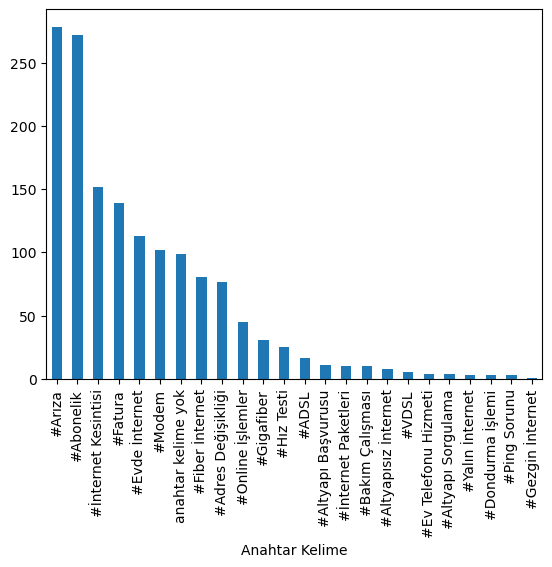

In [9]:
# Anahtar kelime frekansı hesaplama
anahtar_kelime_frekans = df['Anahtar Kelime'].value_counts()
print(anahtar_kelime_frekans)

# Bar grafiği ile en sık şikayet edilen konular
anahtar_kelime_frekans.plot(kind='bar')

### Zaman Bazlı Şikayet Yoğunluğu

In [11]:
# 'Tarih Düzeltilmiş' sütununu datetime formatına dönüştürmeyi unutmayın (eğer daha önce yapılmadıysa)
df['Tarih Düzeltilmiş'] = pd.to_datetime(df['Tarih Düzeltilmiş'], format='%d.%m.%Y')

# Her gün için şikayet sayısını bulma
gun_bazinda_sikayet = df.groupby('Tarih Düzeltilmiş').size()

# Sonuçları görmek
print(gun_bazinda_sikayet)

Tarih Düzeltilmiş
2024-09-22     7
2024-09-23    28
2024-09-24    33
2024-09-25    47
2024-09-26    41
2024-09-27    52
2024-09-28    33
2024-09-29    30
2024-09-30    44
2024-10-01    39
2024-10-02    44
2024-10-03    50
2024-10-04    38
2024-10-05    31
2024-10-06    23
2024-10-07    48
2024-10-08    50
2024-10-09    33
2024-10-10    37
2024-10-11    32
2024-10-12    23
2024-10-13    19
2024-10-14    34
2024-10-15    36
2024-10-16    43
2024-10-17    30
2024-10-18    24
2024-10-19    24
2024-10-20    13
2024-10-21    22
2024-10-22    29
2024-10-23    25
2024-10-24    29
2024-10-25    26
2024-10-26    30
2024-10-27    22
2024-10-28    37
2024-10-29    21
2024-10-30    31
2024-10-31    29
2024-11-01    33
2024-11-02    37
2024-11-03    23
2024-11-04    34
2024-11-05    36
2024-11-06    29
2024-11-07    15
dtype: int64


In [12]:
# 'Tarih Düzeltilmiş' sütununu datetime formatına dönüştürdüyseniz (yapmadıysanız önce bunu yapmalısınız)
df['Tarih Düzeltilmiş'] = pd.to_datetime(df['Tarih Düzeltilmiş'], format='%d.%m.%Y')

# Ay ve yıl bazında gruplama yapma
ay_bazinda_sikayet = df.groupby(df['Tarih Düzeltilmiş'].dt.to_period('M')).size()

# Aylık ortalama şikayet sayısını hesaplama
ortalama_sikayet = ay_bazinda_sikayet.mean()

# Sonuçları görmek
print("Aylık Şikayet Sayıları:\n", ay_bazinda_sikayet)
print("\nAylık Ortalama Şikayet Sayısı:", ortalama_sikayet)

Aylık Şikayet Sayıları:
 Tarih Düzeltilmiş
2024-09    315
2024-10    972
2024-11    207
Freq: M, dtype: int64

Aylık Ortalama Şikayet Sayısı: 498.0


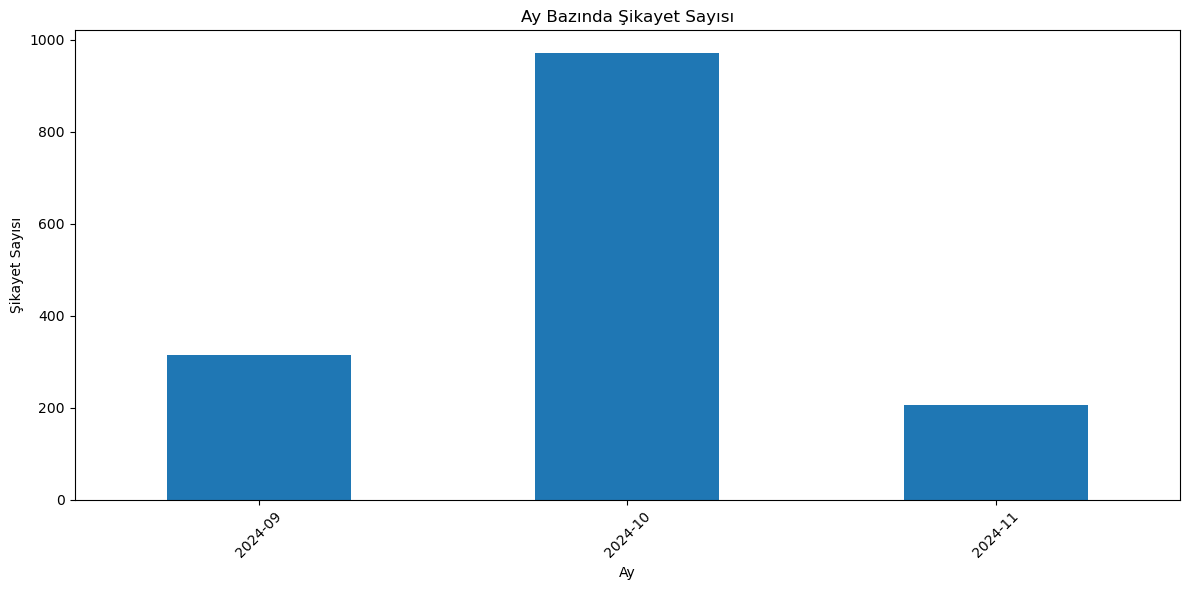

In [13]:
import matplotlib.pyplot as plt

# Bar grafiği ile görselleştirme
ay_bazinda_sikayet.plot(kind='bar', figsize=(12, 6))
plt.title("Ay Bazında Şikayet Sayısı")
plt.xlabel("Ay")
plt.ylabel("Şikayet Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Saygılarımla,
### Zeynep Açıkgöz